In [1]:
import pandas as pd
import numpy as np

from pydataset import data
import helpers

In [2]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)

In [3]:
df = data('iris')
df.columns = [helpers.util.make_valid_py_id(col) for col in df]
target = 'species'

In [4]:
X = df.drop(columns=target)
y = df[target]

In [5]:
import sklearn.metrics as skm

In [6]:
model.fit(X, y)
p = model.predict(X)

In [7]:
c = model.classes_

In [8]:
cm = skm.confusion_matrix(y, p)

In [9]:
cmdf = pd.DataFrame(cm, columns=c, index=c)
cmdf

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,47,3
virginica,0,1,49


In [10]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [15]:
import pysankey

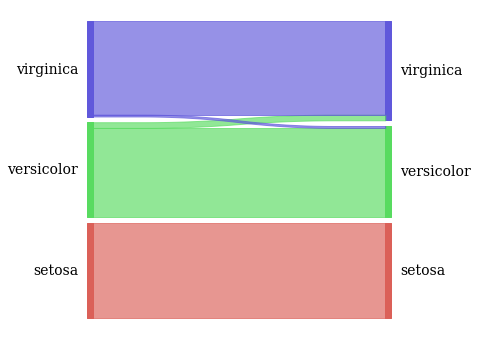

In [17]:
pysankey.sankey(left=y, right=p)

In [31]:
pd.Series(p).value_counts()

virginica     52
setosa        50
versicolor    48
dtype: int64

In [18]:
cmdf

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,47,3
virginica,0,1,49


In [37]:
melted = pd.melt(cmdf.reset_index(), id_vars='index')
melted

,index,variable,value
0,setosa,setosa,50
1,versicolor,setosa,0
2,virginica,setosa,0
3,setosa,versicolor,0
4,versicolor,versicolor,47
5,virginica,versicolor,1
6,setosa,virginica,0
7,versicolor,virginica,3
8,virginica,virginica,49


In [66]:
def plot_crosstab_treemap(crosstab):
    melted = pd.melt(cmdf.reset_index(), id_vars='index')
    import plotly.express as px
    fig = px.treemap(melted, path=[px.Constant("all"), 'index', 'variable'], values='value')
    fig.update_traces(root_color="lightgrey")
    fig.update_layout(
        autosize=False,
        width=800,
        height=400,
        margin={'t':30,'b':10,'l':10,'r':10})
    fig.show()

plot_crosstab_treemap(cmdf)

In [59]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
